# Gradient boosting algorithms

In [261]:
from IPython.core.debugger import set_trace

#%load_ext nb_black

import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

In [14]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples = 10000, n_features = 20, n_informative = 15, n_redundant = 5, random_state = 0
)

In [20]:
X.shape


(10000, 20)

In [39]:
accuracy = {}
speed = {}

### Scikit-Learn

In [123]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

In [41]:
model = GradientBoostingClassifier()

start = time.time()
cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 2, random_state = 0)
score = cross_val_score(model, X, y, scoring = "accuracy", cv = cv, n_jobs = -1)

speed["GradientBoosting"] = np.round(time.time() - start, 3)
accuracy["GradientBoosting"] = np.mean(score).round(3)

print(
    f"Mean Accuracy: {accuracy["GradientBoosting"]}\nStd: {np.std(score):.3f}\nRun time: {speed['GradientBoosting']}s"
)



Mean Accuracy: 0.878
Std: 0.007
Run time: 70.034s


Remark: We used the default parameters since we didn't specify the parameters when calling model()

learning_rate = 0.3

n_estimators = 100

max_depth = 6

subsample = 1

colsample_bytree = 1


### Alternative

In [46]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

In [59]:
model = HistGradientBoostingClassifier()

start = time.time()
cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 2, random_state = 0)
score = cross_val_score(model, X, y, scoring = "accuracy", cv = cv, n_jobs = -1)

speed["HistGradientBoostingClassifier"] = np.round(time.time() - start, 3)
accuracy["HistGradientBoostingClassifier"] = np.mean(score).round(3)

print(
    f"Mean Accuracy: {accuracy["HistGradientBoostingClassifier"]}\nStd: {np.std(score):.3f}\nRun time: {speed['HistGradientBoostingClassifier']}s"
)


Mean Accuracy: 0.948
Std: 0.005
Run time: 0.964s


Take-away: Always use the histogram-based approach

In [62]:
from xgboost import XGBClassifier

In [76]:
model = XGBClassifier()

start = time.time()
cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 2, random_state = 0)
score = cross_val_score(model, X, y, scoring = "accuracy", cv=cv, n_jobs = -1)

speed["XGB"] = np.round(time.time() - start, 3)
accuracy["XGB"] = np.mean(score).round(3)

print(
    f"Mean Accuracy: {accuracy["XGB"]}\nStd: {np.std(score):.3f}\nRun time: {speed['XGB']}s"
)

Mean Accuracy: 0.958
Std: 0.003
Run time: 2.922s


In [78]:
#!pipenv install lightgbm --skip-lock
from lightgbm import LGBMClassifier

In [127]:
model = LGBMClassifier()

start = time.time()
cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 2, random_state = 0)
score = cross_val_score(model, X, y, scoring = "accuracy", cv = cv, n_jobs = -1)

speed["LGBM"] = np.round(time.time() - start, 3)
accuracy["LGBM"] = np.mean(score).round(3)

print(
    f"Mean Accuracy: {accuracy["LGBM"]}\nStd: {np.std(score):.3f}\nRun time: {speed['LGBM']}s"
)

Mean Accuracy: 0.948
Std: 0.005
Run time: 8.85s


In [129]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    "n_estimators": [100, 300, 500],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [3, 5, 7]
}

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=0)

search = RandomizedSearchCV(
    estimator=LGBMClassifier(),
    param_distributions=param_dist,
    n_iter=10,
    cv=cv,
    scoring="accuracy",
    n_jobs=-1
)

search.fit(X, y)


[LightGBM] [Info] Number of positive: 4999, number of negative: 5001
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004381 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5100
[LightGBM] [Info] Number of data points in the train set: 10000, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499900 -> initscore=-0.000400
[LightGBM] [Info] Start training from score -0.000400
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=5, random_state=0),
                   estimator=LGBMClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 300, 500]},
                   scoring='accuracy')

In [141]:
best_model = search.best_estimator_
print(search.best_params_)
print(search.best_score_)

results = pd.DataFrame(search.cv_results_)
print(results.sort_values("rank_test_score").head())


{'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.1}
0.961
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
2       6.040264      0.059112         0.010534        0.001550   
7       8.121730      0.117512         0.015623        0.006886   
3       2.580667      0.140883         0.006644        0.004425   
4       3.132307      0.062260         0.009328        0.002603   
1       5.763300      0.102627         0.003957        0.004313   

   param_n_estimators  param_max_depth  param_learning_rate  \
2                 300                7                  0.1   
7                 500                5                  0.1   
3                 100                7                  0.1   
4                 500                3                  0.1   
1                 100                5                  0.1   

                                              params  split0_test_score  \
2  {'n_estimators': 300, 'max_depth': 7, 'learnin...             0.9660   
7 

In [147]:

importance = pd.Series(
    best_model.feature_importances_,
    index=pd.DataFrame(X).columns
).sort_values(ascending=False)

print(importance)

1     649
14    605
12    602
4     561
6     561
18    560
17    548
15    493
5     481
7     432
9     431
8     426
16    418
3     369
2     362
10    357
19    309
13    305
11    256
0     235
dtype: int32


In [155]:
pip install optuna

Note: you may need to restart the kernel to use updated packages.


In [153]:
import optuna
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def objective(trial):

    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
        "learning_rate": trial.suggest_float("learning_rate", 0.005, 0.2, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 16, 256),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
        "random_state": 42
    }

    model = LGBMClassifier(**params)

    score = cross_val_score(
        model,
        X,
        y,
        cv=cv,
        scoring="accuracy",
        n_jobs=-1
    ).mean()

    return score


In [157]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)


[I 2026-02-23 12:35:36,826] A new study created in memory with name: no-name-bceae5f5-1d24-4e1b-949f-4592b46d6cde
[I 2026-02-23 12:35:50,623] Trial 0 finished with value: 0.9556999999999999 and parameters: {'n_estimators': 771, 'learning_rate': 0.011256680512435188, 'num_leaves': 47, 'max_depth': 11, 'subsample': 0.8170802966091176, 'colsample_bytree': 0.9150211552904206, 'min_child_samples': 7}. Best is trial 0 with value: 0.9556999999999999.
[I 2026-02-23 12:35:56,178] Trial 1 finished with value: 0.9344999999999999 and parameters: {'n_estimators': 247, 'learning_rate': 0.015718556848901836, 'num_leaves': 57, 'max_depth': 8, 'subsample': 0.9893381116927046, 'colsample_bytree': 0.7785723182305471, 'min_child_samples': 47}. Best is trial 0 with value: 0.9556999999999999.
[I 2026-02-23 12:36:05,749] Trial 2 finished with value: 0.9671 and parameters: {'n_estimators': 948, 'learning_rate': 0.10279889595946724, 'num_leaves': 48, 'max_depth': 10, 'subsample': 0.7858803283963628, 'colsample

In [165]:
print("Best score:", study.best_value)
print("Best params:", study.best_params)
best_model = LGBMClassifier(**study.best_params)
best_model.fit(X, y)


Best score: 0.9693000000000002
Best params: {'n_estimators': 795, 'learning_rate': 0.07050116647479311, 'num_leaves': 152, 'max_depth': 12, 'subsample': 0.7632297374821004, 'colsample_bytree': 0.8418336831001525, 'min_child_samples': 44}
[LightGBM] [Info] Number of positive: 4999, number of negative: 5001
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001265 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5100
[LightGBM] [Info] Number of data points in the train set: 10000, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499900 -> initscore=-0.000400
[LightGBM] [Info] Start training from score -0.000400
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

LGBMClassifier(colsample_bytree=0.8418336831001525,
               learning_rate=0.07050116647479311, max_depth=12,
               min_child_samples=44, n_estimators=795, num_leaves=152,
               subsample=0.7632297374821004)

In [167]:
score = cross_val_score(best_model, X, y, scoring="accuracy", cv=cv, n_jobs = -1)


In [171]:
np.mean(score)

0.9666

# Catboost

In [97]:
#!pip install catboost 
from catboost import CatBoostClassifier

In [103]:
model = CatBoostClassifier()

start = time.time()
cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 2, random_state = 0)
score = cross_val_score(model, X, y, scoring="accuracy", cv=cv, n_jobs = -1)

speed["CatBoost"] = np.round(time.time() - start, 3)
accuracy["CatBoost"] = np.mean(score).round(3)

print(
    f"Mean Accuracy: {accuracy["CatBoost"]}\nStd: {np.std(score):.3f}\nRun time: {speed['CatBoost']}s"
)

Mean Accuracy: 0.964
Std: 0.004
Run time: 15.226s


In [111]:
print("Accuracy:")
{k:v for k,v in sorted(accuracy.items(), key = lambda i: i[1], reverse = True)}

Accuracy:


{'CatBoost': 0.964,
 'XGB': 0.958,
 'HistGradientBoostingClassifier': 0.948,
 'LGBM': 0.948,
 'GradientBoosting': 0.878}

In [115]:
print("Speed:")
{k:v for k,v in sorted(speed.items(), key = lambda i: i[1])}

Speed:


{'HistGradientBoostingClassifier': 0.964,
 'XGB': 2.922,
 'LGBM': 4.845,
 'CatBoost': 15.226,
 'GradientBoosting': 70.034}

In [119]:
model.get_params()

{}

# For time series

In [551]:
df = pd.read_csv("monthly.csv")
df = np.log(df[["Price"]].copy())


In [553]:
df["lag1"] = df.Price.shift(1)
df["lag2"] = df.Price.shift(2)
df["lag3"] = df.Price.shift(3)
df["lag4"] = df.Price.shift(4)
df["lag5"] = df.Price.shift(5)
df["lag6"] = df.Price.shift(6)
df["lag7"] = df.Price.shift(7)
df["lag8"] = df.Price.shift(8)
df["lag9"] = df.Price.shift(9)
df["lag10"] = df.Price.shift(10)
df["lag11"] = df.Price.shift(11)
df["lag12"] = df.Price.shift(12)
df["target"] = df.Price.shift(-1)


df.dropna(inplace = True)

In [555]:
def train_test_split(data, perc):
    data = data.values
    n = int(len(data) * (1-perc))
    
    return data[:n], data[n:]

In [557]:
train, test = train_test_split(df, .2)
X = train[:,:-1]
y = train[:,-1]
y

array([2.94074797, 2.94074797, 2.94074797, ..., 6.01190423, 5.99426063,
       6.01349508])

In [563]:
from xgboost import XGBRegressor

model = XGBRegressor(objective = "reg:squarederror", n_estimators = 3000)
model.fit(X,y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=3000,
             n_jobs=None, num_parallel_tree=None, ...)

In [499]:
X[0]

array([2.94074797, 2.94074797, 2.94074797, 2.94074797, 2.94074797,
       2.94074797, 2.94074797, 2.94074797, 2.94074797, 2.94074797,
       2.94074797, 2.94074797, 2.94074797])

In [567]:
#val = np.array(test[0,:-1]).reshape(-1,1)
val = np.array(test[0,:-1]).reshape(1,-1)

pred = model.predict(val)
print(pred[0])

5.979316


# Predict

In [569]:
def xgb_predict(train, val):
    train = np.array(train)
    X,y = train[:,:-1], train[:,-1]
    model = XGBRegressor(objective = "reg:squarederror", n_estimators = 3000)
    model.fit(X,y)

    val = np.array(val).reshape(1,-1)
    pred = model.predict(val)
    return pred[0]

In [571]:
xgb_predict(train, test[0, :-1])

5.979316

## Walk-forward validation

In [574]:
#from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error

def validate(data, perc):
    predictions = []
    
    train, test = train_test_split(data,perc)
    history = [x for x in train]
    for i in range(len(test)):
        test_X, test_Y = test[i,:-1], test[i, -1]
        pred = xgb_predict(history, test_X)
        #pred = xgb_predict(history, test_X)
        predictions.append(pred)
        history.append(test[i])

    error = root_mean_squared_error(test[:,-1], predictions)

    return error, test[:,-1], predictions

In [576]:
rmse, y, pred = validate(df, .05)
print(rmse)

0.05353404456388217


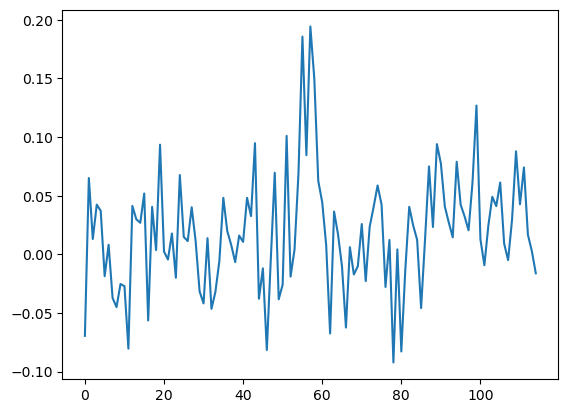

In [577]:
plt.plot(y-pred)


In [ ]:
def autocorrelation_test(y,pred): 
    delta = pd.DataFrame(y-pred)
    cor = delta * delta.shift(1)
    cor = cor.dropna()
    sigma = np.std(delta)
    N = len(cor)
    return np.sum(cor/(np.sqrt(N)*sigma**2))

In [588]:
train = np.array(df)
X,y = train[:,:-1], train[:,-1]
model = XGBRegressor(objective = "reg:squarederror", n_estimators = 10000)
model.fit(X,y)



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=10000,
             n_jobs=None, num_parallel_tree=None, ...)

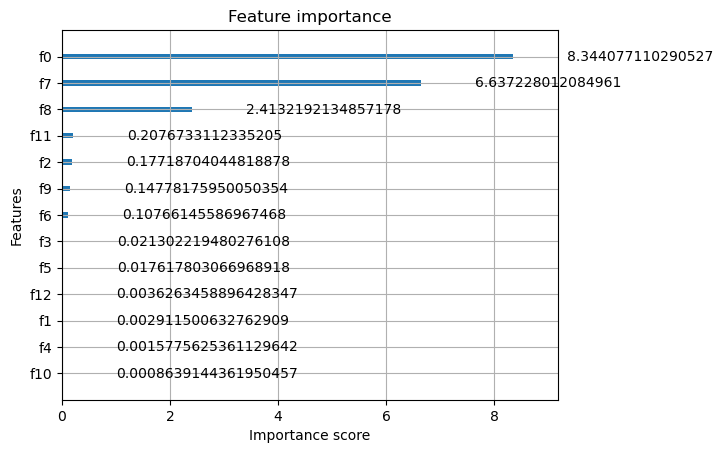

In [599]:
from xgboost import plot_importance

plot_importance(model, importance_type="gain")
plt.show()

In [592]:
rmse, y, pred = validate(df, .95)

In [595]:
rmse

0.04241245811891092

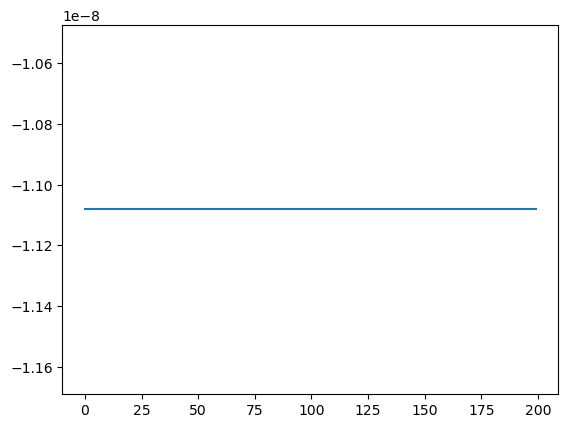

In [607]:
plt.plot(y[:200]-pred[:200])